# Imports

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from src.utilis import load_object
import shap
import importlib

# Data

In [5]:
sys.path.append(r'C:\Users\Lenovo\Documents\DSPython\projetscoring')

In [6]:
# Data Ingestion : import des data et autres fonctionnalité
from src.components.data_ingestion import *

In [7]:
# 01 - Data Base : 
# Le chemin pour accéder à la base des données se trouve dans les configurations : data_config.py
data_base = DataIngestion()

In [15]:
df = pd.read_csv('C:/Users/Lenovo/Documents/DSPython/data_projet_7/Final_test_df.csv')

In [74]:
# Data Transformation : Transformation des data
from src.components.data_transformation import DataTransformation

In [81]:
importlib.reload(sys.modules['src.components.data_transformation'])
from src.components.data_transformation import DataTransformation

In [273]:
# Data Importer X_train X_tes : sans transformation
transformer_row_data= DataTransformation()
X_train,X_test, y_train, y_test = transformer_row_data.get_data_frames()

MemoryError: Unable to allocate 1000. MiB for an array with shape (609, 215254) and data type float64

In [77]:
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (215254, 795)
X_test : (92253, 795)
y_train : (215254, 1)
y_test : (92253, 1)


In [ ]:
X_train.head(3)

In [79]:
y_train.head(3)

,TARGET
0,0
1,1
2,1


# data trasnformation

In [83]:
X_train, X_test, y_train,y_test = transformer_row_data.initiate_data_transformation(X_train, 
                                                                                    X_test,
                                                                                    y_train,
                                                                                    y_test, 
                                                                                    undersampling= True, 
                                                                                    return_train_test_array=False, 
                                                                                    save_preprocessor=False)

TARGET distribution avant Undersampling
TARGET
0         197877
1          17377
dtype: int64

TARGET distribution après Undersampling
TARGET
0         57923
1         17377
dtype: int64

Les étapes de transformation :
ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaled', StandardScaler())]),
                                 ['CODE_GENDER', 'FLAG_OWN_CAR',
                                  'FLAG_OWN_REALTY', 'CNT_CHILDREN',
                                  'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                  'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                                  'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
                                  'DAYS_ID_PUBLISH', 'OWN_...
                                  'REG_REGION_NOT_WORK_REGION',
                          

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


# Modèle et preprocessor

In [23]:
MODEL_PATH = "C:/Users/Lenovo/Documents/DSPython/projetscoring/notebook/artifacts/best_model_pretrained.pkl"
PREPROCESSOR_PATH = "C:/Users/Lenovo/Documents/DSPython/projetscoring/notebook/artifacts/preprocessor_best_model.pkl"
model = load_object(MODEL_PATH)
preprocessor = load_object(PREPROCESSOR_PATH)

In [85]:
model

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [33]:
# preprocessor.get_feature_names_out ()

In [45]:
# X_train = X_train.replace((np.inf, -np.inf), np.nan).reset_index(drop=True)
# X_train_scaled = preprocessor.transform(X_train)
# X_train = pd.DataFrame(X_train_scaled, columns= list(X_train.columns))
# X_train

# feature_names_X_train = preprocessor.get_feature_names_out()
# X_train = pd.DataFrame(X_train_scaled, columns=feature_names_X_train)

In [46]:
# X_test = X_test.replace((np.inf, -np.inf), np.nan).reset_index(drop=True)
# X_train_scaled = preprocessor.transform(X_test)
# X_test = pd.DataFrame(X_train_scaled, columns= list(X_test.columns))
# X_test

In [238]:
explainer = shap.LinearExplainer(model,  X_train)

In [239]:
shap_values = explainer.shap_values(X_test)

In [241]:
import pickle
# Sauvegarde des shap values
with open('Explainer_LogReg.pkl', 'wb') as fichier:
    mon_pickler = pickle.Pickler(fichier)
    mon_pickler.dump(explainer)

In [11]:
import pickle
# PImportation des shap values
with open('Explainer_LogReg.pkl', 'rb') as fichier:
    my_depickler = pickle.Unpickler(fichier)
    explainer_LogReg = my_depickler.load()

In [12]:
explainer_LogReg

In [13]:
X_test.loc[X_test["REGION_POPULATION_RELATIVE"] == 0.15063]

NameError: name 'X_test' is not defined

In [39]:
df.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100001,0,0,0,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100005,1,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100013,1,1,0,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0
3,100028,0,0,0,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
4,100038,1,1,1,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_client= df.loc[df["SK_ID_CURR"] == 100005]

In [41]:
df_client

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
1,100005,1,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_client = df_client.drop(["SK_ID_CURR"], axis=1)

In [43]:
df_client

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
1,1,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_client = df_client.replace((np.inf, -np.inf), np.nan).reset_index(drop=True)

In [45]:
data_scaled= preprocessor.transform(df_client)

In [46]:
data_scaled = pd.DataFrame(data_scaled, columns= list(df_client.columns))

In [47]:
data_scaled

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0.783909,-0.692704,-0.671013,-0.59476,-0.109468,-0.948889,-0.701435,-0.979866,1.199825,-0.597038,...,0.0,-2.420554e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.031296e-16


In [48]:
shap_values = explainer_LogReg.shap_values(data_scaled.loc[0])

In [63]:
shap_values

array([-0.02305499, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.06909277, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.12139101,  0.34168017,  0.09875189,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.  

In [64]:
test_2 = pd.DataFrame(shap_values, index= list(data_scaled.columns), columns=['shape_values'])

In [68]:
test_2 = test_2.reset_index()

In [70]:
test_2 = test_2.rename(columns={'index': 'Features'})
test_2

,Features,shape_values
0,CODE_GENDER,-0.023055
1,FLAG_OWN_CAR,-0.000000
2,FLAG_OWN_REALTY,-0.000000
3,CNT_CHILDREN,-0.000000
4,AMT_INCOME_TOTAL,-0.000000
...,...,...
790,CC_NAME_CONTRACT_STATUS_nan_MAX,0.000000
791,CC_NAME_CONTRACT_STATUS_nan_MEAN,0.000000
792,CC_NAME_CONTRACT_STATUS_nan_SUM,0.000000
793,CC_NAME_CONTRACT_STATUS_nan_VAR,0.000000


In [65]:
test_2.to_json(indent=4)

'{\n    "shape_values":{\n        "CODE_GENDER":-0.0230549938,\n        "FLAG_OWN_CAR":0.0,\n        "FLAG_OWN_REALTY":0.0,\n        "CNT_CHILDREN":0.0,\n        "AMT_INCOME_TOTAL":0.0,\n        "AMT_CREDIT":0.0,\n        "AMT_ANNUITY":0.0,\n        "AMT_GOODS_PRICE":0.0,\n        "REGION_POPULATION_RELATIVE":0.0,\n        "DAYS_BIRTH":0.0,\n        "DAYS_EMPLOYED":-0.0690927662,\n        "DAYS_REGISTRATION":0.0,\n        "DAYS_ID_PUBLISH":0.0,\n        "OWN_CAR_AGE":0.0,\n        "FLAG_MOBIL":0.0,\n        "FLAG_EMP_PHONE":0.0,\n        "FLAG_WORK_PHONE":0.0,\n        "FLAG_CONT_MOBILE":0.0,\n        "FLAG_PHONE":0.0,\n        "FLAG_EMAIL":0.0,\n        "CNT_FAM_MEMBERS":0.0,\n        "REGION_RATING_CLIENT":0.0,\n        "REGION_RATING_CLIENT_W_CITY":0.0,\n        "HOUR_APPR_PROCESS_START":0.0,\n        "REG_REGION_NOT_LIVE_REGION":0.0,\n        "REG_REGION_NOT_WORK_REGION":0.0,\n        "LIVE_REGION_NOT_WORK_REGION":0.0,\n        "REG_CITY_NOT_LIVE_CITY":0.0,\n        "REG_CITY_NOT_W

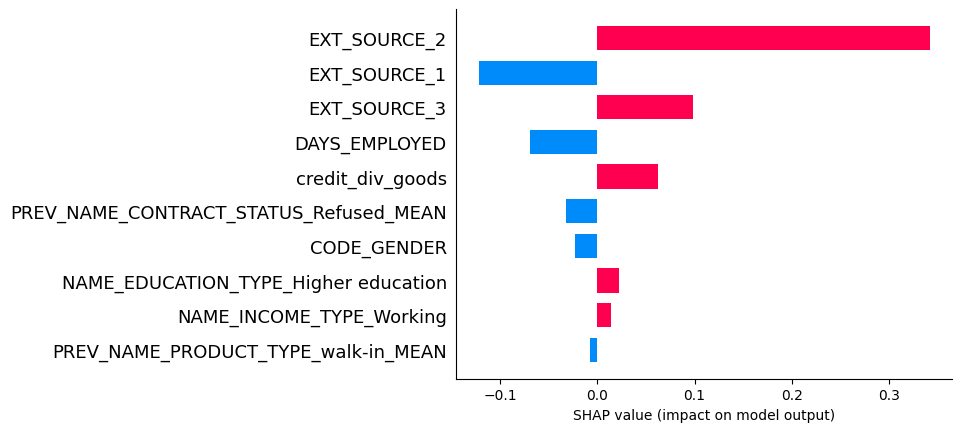

Text(0.5, 0.98, 'Explainer ')

<Figure size 640x480 with 0 Axes>

In [54]:
shap.bar_plot(shap_values, max_display=10, show=True, feature_names=data_scaled.columns)
fig = plt.gcf()
fig.suptitle('Explainer ', fontsize=16)

In [244]:
shap_values_ind = explainer_LogReg.shap_values(X_test.loc[idx])

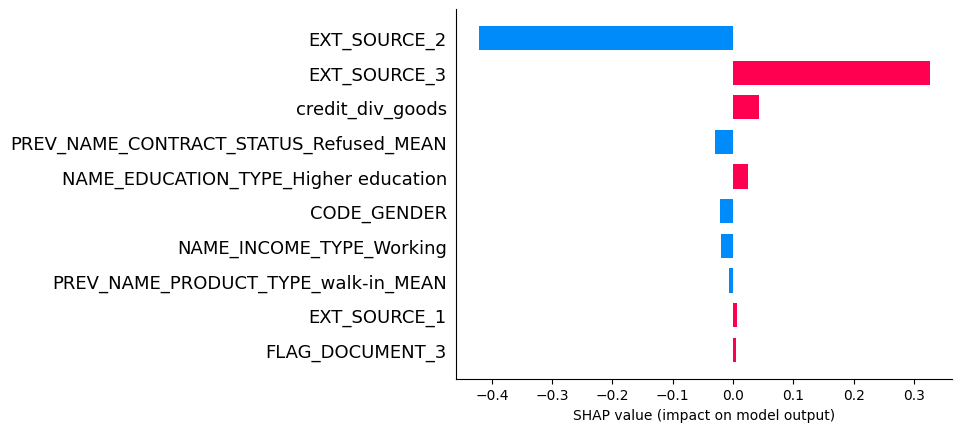

Text(0.5, 0.98, 'Explainer ')

<Figure size 640x480 with 0 Axes>

In [258]:
shap.bar_plot(shap_values_ind, max_display=10, show=True, feature_names=X_test.columns)
fig = plt.gcf()
fig.suptitle('Explainer ', fontsize=16)

# Tests


In [86]:
import shap
from lime.lime_tabular import LimeTabularExplainer

In [87]:
model.coef_

array([[-0.03057112,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.05797101,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.15770097, -0.35409012, -0.38211292,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

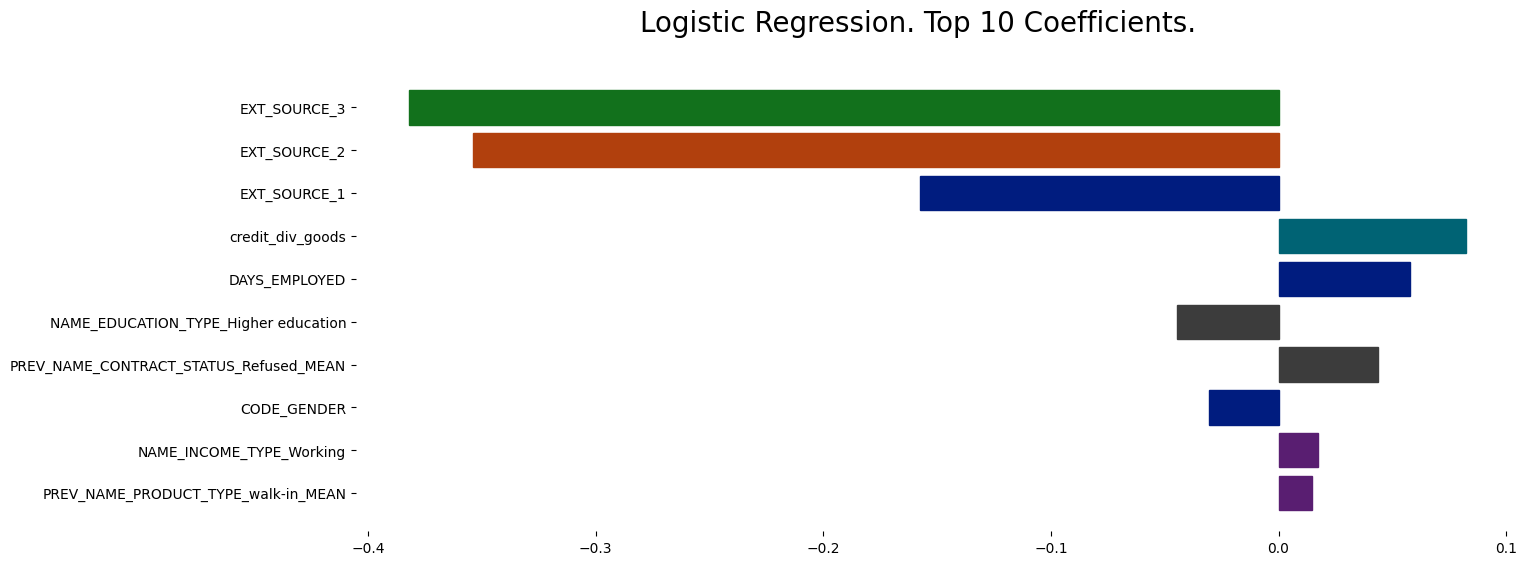

In [88]:
plt.figure(figsize=(15,6))
logistic_reg_coeff = model.coef_
color_list =  sns.color_palette("dark", len(X_train.columns)) 
top_x = 10
logistic_reg_coeff = model.coef_[0]
idx = np.argsort(np.abs(logistic_reg_coeff))[::-1] 
lreg_ax = plt.barh(X_train.columns[idx[:top_x]][::-1], logistic_reg_coeff[idx[:top_x]][::-1])
for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False) 
lr_title = plt.suptitle("Logistic Regression. Top " + str(top_x) + " Coefficients.", fontsize=20, fontweight="normal")
plt.show()

In [39]:
top_x = 10
logistic_reg_coeff = model.coef_[0]
idx = np.argsort(np.abs(logistic_reg_coeff))[::-1]

In [40]:
logistic_reg_coeff[idx[:top_x]][::-1]

array([ 0.01491772,  0.01720458, -0.03057112,  0.0438437 , -0.04448775,
        0.05797101,  0.08220109, -0.15770097, -0.35409012, -0.38211292])

Explications avec LIME : 
L'explication indépendante du modèle interprétable local (LIME) fournit une méthode rapide et relativement simple pour expliquer localement les modèles de boîte noire. L'algorithme LIME peut être simplifié en quelques étapes.

Pour un point de données donné, perturbez de manière aléatoire ses caractéristiques à plusieurs reprises. Pour les données tabulaires, cela implique d'ajouter une petite quantité de bruit à chaque entité.

Obtenez des prédictions pour chaque instance de données perturbée. Cela nous aide à construire une image locale de la surface de décision à ce point.

Utilisez des prédictions pour calculer un "modèle d'explication" linéaire approximatif à l'aide de prédictions. Les coefficients du modèle linéaire sont utilisés comme explications.

La bibliothèque python LIME fournit des interfaces pour expliquer les modèles construits sur des données tabulaires (TabularExplainer), image (LimeImageExplainer) et texte (LimeTextExplainer).

Dans la section suivante, nous tenterons d'expliquer les prédictions à partir d'une seule instance de données de test pour tous nos modèles entraînés à l'aide de LimeTabularExplainer.

## LIME Tabular Explainer: Explain a test data instance for all models

In [91]:
X_train.values

array([[ 0.7406445 , -0.70662088,  1.50249259, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7406445 , -0.70662088, -0.66556069, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7406445 ,  1.41518604, -0.66556069, ...,  0.        ,
         0.        , -1.07277923],
       ...,
       [-1.35017543, -0.70662088, -0.66556069, ...,  0.        ,
         0.        , -1.91587007],
       [ 0.7406445 , -0.70662088,  1.50249259, ...,  0.        ,
         0.        , -0.28589444],
       [ 0.7406445 , -0.70662088, -0.66556069, ...,  0.        ,
         0.        ,  0.        ]])

Dans la section suivante, nous allons générer et visualiser les explications de chaux pour un point de données donné dans notre ensemble de test. Nous le ferons pour tous nos modèles entraînés.

In [162]:
 lime_explainer = LimeTabularExplainer(X_train.to_numpy(),
                                      feature_names=list(X_train.columns),
                                      class_names= {0: 'Solvable', 1: 'Insolvable'},
                                      mode="classification"
                                      )

In [249]:
lime_explainer

In [254]:
import dill
with open('Lime_Explainer.pkl', 'wb') as f:
    dill.dump(explainer, f)

In [158]:
import random
idx = random.randint(1, len(X_test))

In [120]:
model.predict(X_test.loc[X_test.index == idx])

array([1], dtype=int64)

In [186]:
idx

21184

In [177]:
X_test.loc[idx]

CODE_GENDER                         0.740644
FLAG_OWN_CAR                       -0.706621
FLAG_OWN_REALTY                     1.502493
CNT_CHILDREN                       -0.583096
AMT_INCOME_TOTAL                   -0.148487
                                      ...   
CC_NAME_CONTRACT_STATUS_nan_MAX     0.000000
CC_NAME_CONTRACT_STATUS_nan_MEAN    0.000000
CC_NAME_CONTRACT_STATUS_nan_SUM     0.000000
CC_NAME_CONTRACT_STATUS_nan_VAR     0.000000
CC_COUNT                            0.000000
Name: 21184, Length: 795, dtype: float64

In [178]:
explanation = lime_explainer.explain_instance(X_test.loc[idx], model.predict_proba,
                                         num_features=20)

X does not have valid feature names, but LogisticRegression was fitted with feature names


In [255]:
explanation